In [39]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Loading data from a CSV file
df = pd.read_csv('/content/insurance.csv')

In [41]:
# Exploring the dataset
print("Column Name Are: \n",df.columns)
print("\n")
print("Top 10 Rows from the dataset are: \n",df.head(10))
print("\n")
print("Describing Data: \n",df.describe())
print("\n")

Column Name Are: 
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Top 10 Rows from the dataset are: 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Describing Data: 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.

In [42]:
# Checking whether there is any null value present or not
print("Null Value Count: ")
print(df.isnull().sum())
print("\n")
print("Data Type of Each Column are: \n",df.dtypes)
print("\n")

Null Value Count: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Data Type of Each Column are: 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object




In [43]:
# Converting Categorical values to Numerical values
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex']) # Female for 0 and male for 1
df['smoker_encoded'] = le.fit_transform(df['smoker']) # Smokers as 1 and Non Smokers as 0
df['region_encoded'] = le.fit_transform(df['region']) # Encoding regions

In [44]:
# Dropping original categorical columns as they cannot be converted into float from string
df = df.drop(['sex', 'smoker', 'region'], axis=1)
print(df.head(10))

   age     bmi  children      charges  sex_encoded  smoker_encoded  \
0   19  27.900         0  16884.92400            0               1   
1   18  33.770         1   1725.55230            1               0   
2   28  33.000         3   4449.46200            1               0   
3   33  22.705         0  21984.47061            1               0   
4   32  28.880         0   3866.85520            1               0   
5   31  25.740         0   3756.62160            0               0   
6   46  33.440         1   8240.58960            0               0   
7   37  27.740         3   7281.50560            0               0   
8   37  29.830         2   6406.41070            1               0   
9   60  25.840         0  28923.13692            0               0   

   region_encoded  
0               3  
1               2  
2               2  
3               1  
4               1  
5               2  
6               2  
7               1  
8               0  
9               1  


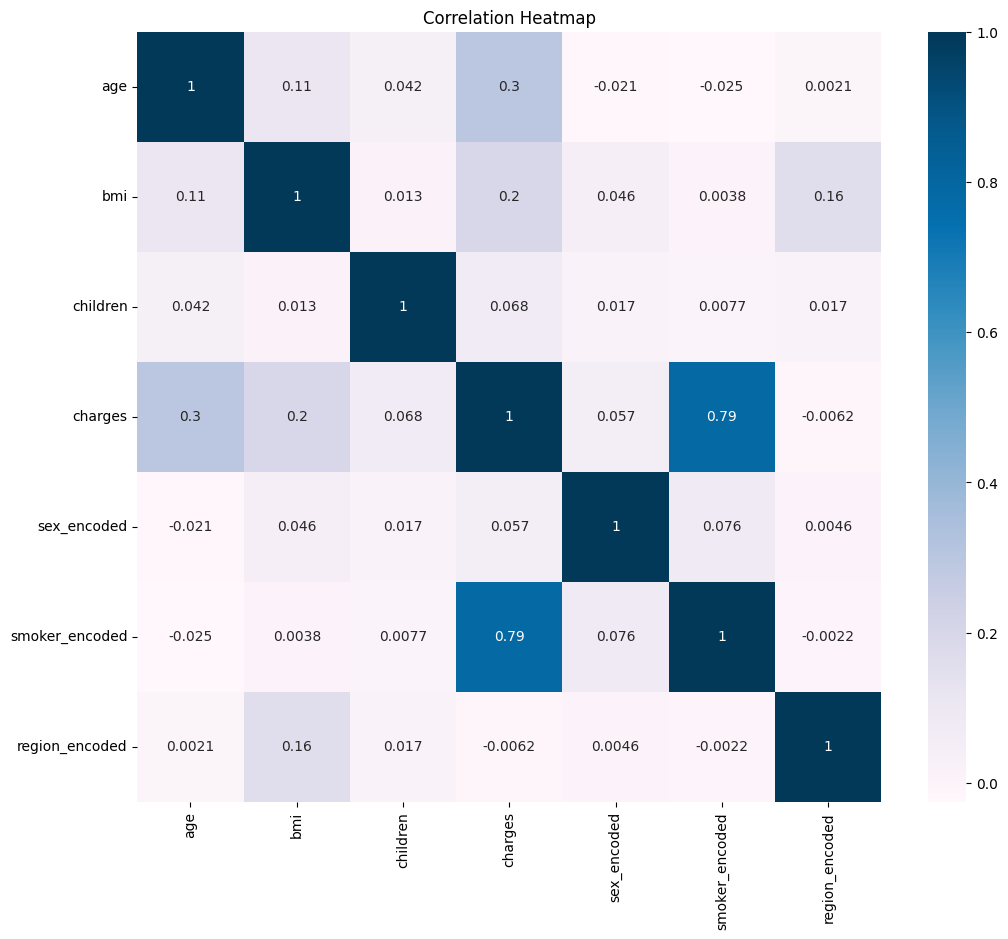

In [45]:
# Plotting Heatmap to see dependency of Dependent value on Independent features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.title('Correlation Heatmap')
plt.show()

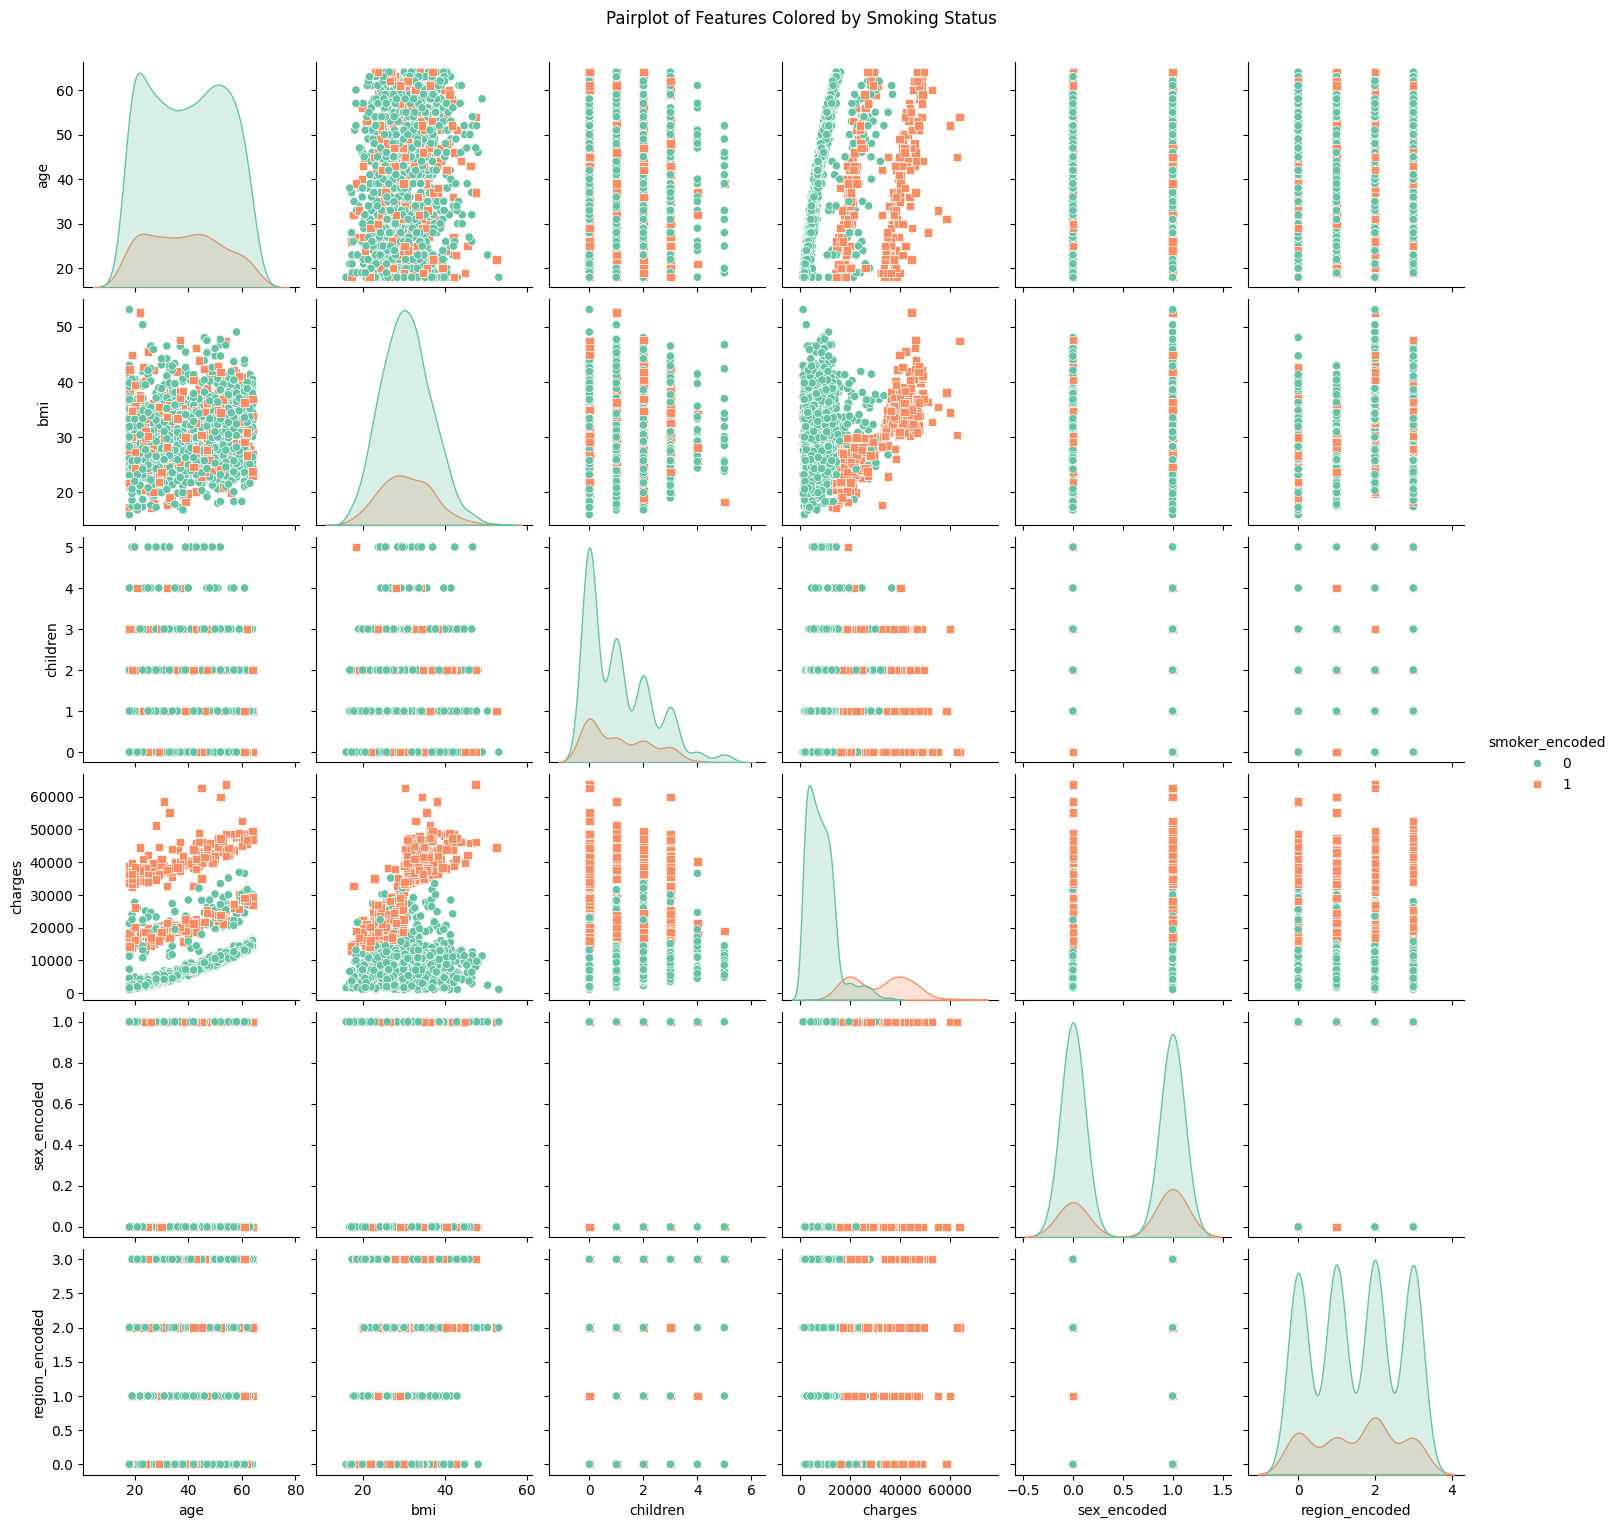

In [46]:
# Pairplot with hue for smoker status and custom palette
sns.pairplot(df, hue='smoker_encoded', palette='Set2', markers=["o", "s"])
plt.suptitle('Pairplot of Features Colored by Smoking Status', y=1.02)
plt.show() # This pairplot shows the relationships between different features, colored by smoking status.
print("\n")

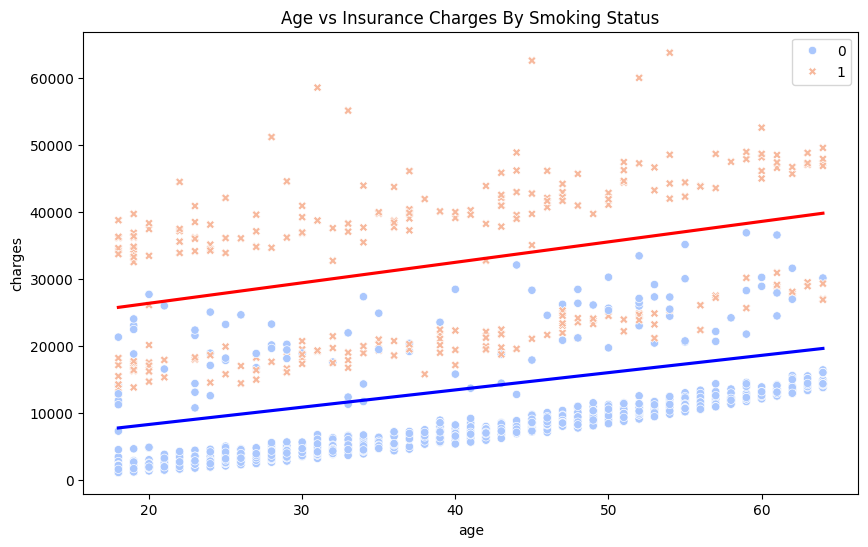

In [47]:
# Scatterplot with regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker_encoded', palette='coolwarm', style='smoker_encoded')
sns.regplot(data=df, x='age', y='charges', scatter=False, color='blue', line_kws={'label': 'Linear Fit (Non-Smoker)'}, ci=None)
sns.regplot(data=df[df['smoker_encoded']==1], x='age', y='charges', scatter=False, color='red', line_kws={'label': 'Linear Fit (Smoker)'}, ci=None)
plt.title('Age vs Insurance Charges By Smoking Status')
plt.legend()
plt.show() # This scatterplot shows the relationship between age and insurance charges, differentiated by smoking status.
print("\n")

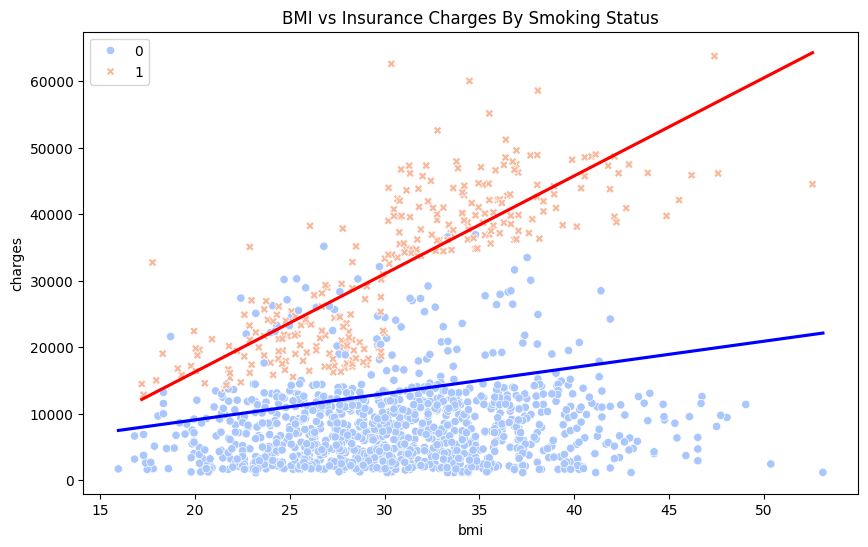

In [48]:
# Scatterplot with regression lines for BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker_encoded', palette='coolwarm', style='smoker_encoded')
sns.regplot(data=df, x='bmi', y='charges', scatter=False, color='blue', line_kws={'label': 'Linear Fit (Non-Smoker)'}, ci=None)
sns.regplot(data=df[df['smoker_encoded']==1], x='bmi', y='charges', scatter=False, color='red', line_kws={'label': 'Linear Fit (Smoker)'}, ci=None)
plt.title('BMI vs Insurance Charges By Smoking Status')
plt.legend()
plt.show() # This scatterplot shows the relationship between BMI and insurance charges, differentiated by smoking status.
print("\n")

In [49]:
# Aggregating data to count number of smokers in each region
smoker_counts = df[df['smoker_encoded'] == 1].groupby('region_encoded').size().reset_index(name='count')

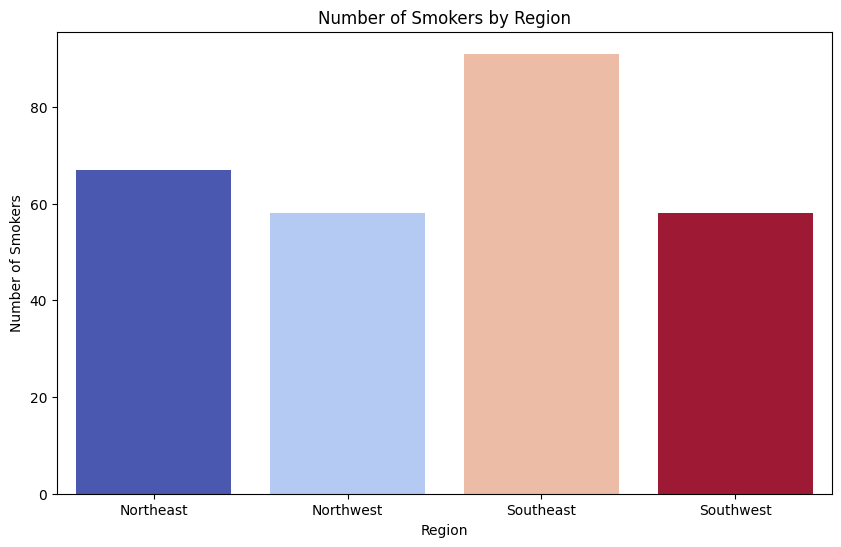

In [50]:
# Bar plot of number of smokers vs region
plt.figure(figsize=(10, 6))
sns.barplot(data=smoker_counts, x='region_encoded', y='count', palette='coolwarm', hue='region_encoded', dodge=False)
plt.title('Number of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Smokers')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Northeast', 'Northwest', 'Southeast', 'Southwest'])
plt.legend([],[], frameon=False)
plt.show()

In [51]:
# Plotting Skew and Kurtosis
skew_kurtosis = df[['age', 'bmi', 'children', 'charges']].agg(['skew', 'kurtosis'])
print(skew_kurtosis)

               age       bmi  children   charges
skew      0.055673  0.284047  0.938380  1.515880
kurtosis -1.245088 -0.050732  0.202454  1.606299


In [52]:
# Data Preparation
X = df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [55]:
# Prediction using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("R^2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression:
R^2: 0.7833463107364538
RMSE: 5799.587091438356


In [56]:
# Prediction using Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression:")
print("R^2:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression:
R^2: 0.7830849126391299
RMSE: 5803.084710238366


In [57]:
# Prediction using Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regression:")
print("R^2:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Regression:
R^2: 0.8637905552826766
RMSE: 4598.515359283179


In [58]:
# Performing Hyper tuning for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [59]:
# Use RandomizedSearchCV to reduce computation time
random_svr = RandomizedSearchCV(SVR(), param_grid_svr, n_iter=10, cv=5, n_jobs=-1)
random_svr.fit(X_train_poly, y_train)

print("Best parameters for SVR:", random_svr.best_params_)
print("Best score for SVR:", random_svr.best_score_)

y_pred_svr_optimized = random_svr.best_estimator_.predict(X_test_poly)
print("Optimized SVR:")
print("R^2:", r2_score(y_test, y_pred_svr_optimized))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr_optimized)))

Best parameters for SVR: {'kernel': 'linear', 'gamma': 'scale', 'C': 10}
Best score for SVR: 0.6801514259688847
Optimized SVR:
R^2: 0.773681631587424
RMSE: 5927.532337266519


In [60]:
# Plotting Graph for all Models to compare performance
models = ['Linear Regression', 'Ridge Regression', 'Random Forest Regression', 'Optimized SVR']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_svr_optimized)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_svr_optimized))]


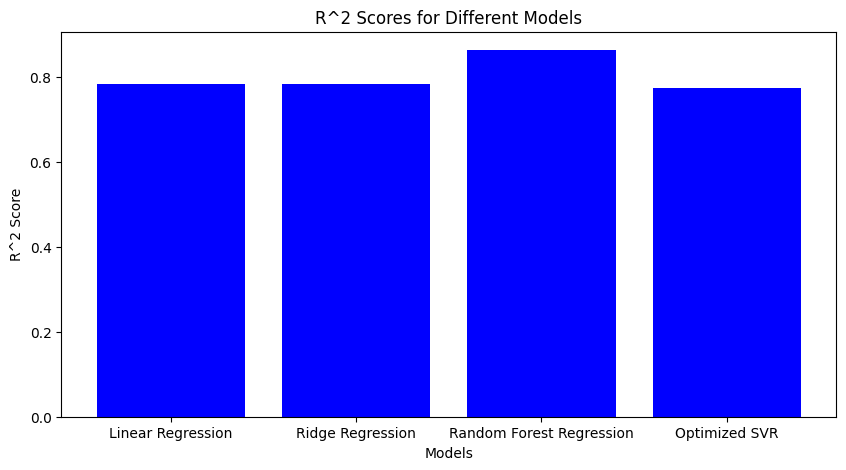

In [62]:
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='Blue')
plt.title('R^2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.show()

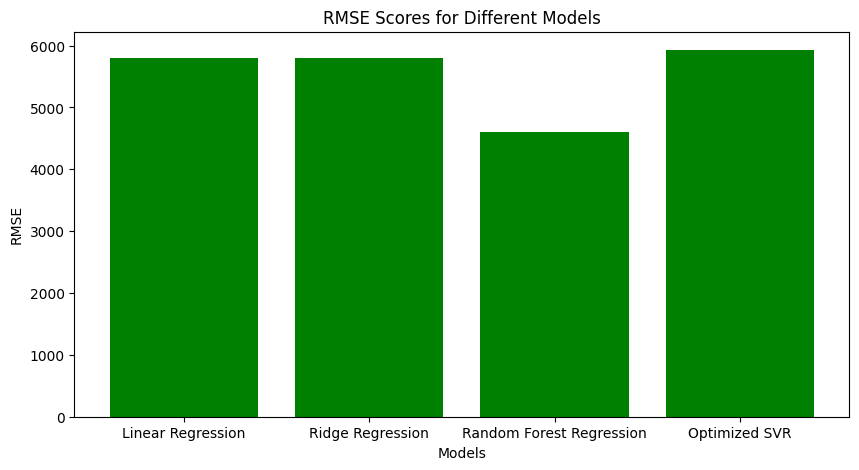

In [63]:
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores, color='green')
plt.title('RMSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()